In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import random


In [2]:
df_110 = pd.read_csv('../documents/data/1619130786.2498584/file_1.csv', index_col=0)
df_90  = pd.read_csv('../documents/data/1618981461.7709868/file_1.csv', index_col=0)
df_70  = pd.read_csv('../documents/data/1618959143.7234676/file_1.csv', index_col=0)
df_50  = pd.read_csv('../documents/data/1618932511.6391993/file_1.csv', index_col=0)
df_30  = pd.read_csv('../documents/data/1618865200.300211/file_1.csv', index_col=0)

In [3]:
waveforms_110 = df_110[1:]
waveforms_90  = df_90[1:]
waveforms_70  = df_70[1:]
waveforms_50  = df_50[1:]
waveforms_30  = df_30[1:]

In [4]:
waveforms_110

,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_41,event_42,event_43,event_44,event_45,event_46,event_47,event_48,event_49,event_50
0,51.0,54.0,53.0,52.0,51.0,52.0,53.0,52.0,53.0,52.0,...,52.0,50.0,53.0,52.0,52.0,53.0,50.0,54.0,52.0,53.0
1,52.0,52.0,51.0,54.0,52.0,50.0,52.0,51.0,51.0,52.0,...,52.0,53.0,53.0,55.0,53.0,51.0,51.0,53.0,54.0,53.0
2,54.0,52.0,53.0,52.0,53.0,55.0,54.0,52.0,51.0,54.0,...,53.0,54.0,51.0,52.0,52.0,53.0,53.0,50.0,51.0,54.0
3,52.0,52.0,53.0,54.0,53.0,51.0,49.0,50.0,50.0,52.0,...,50.0,51.0,53.0,53.0,53.0,54.0,53.0,51.0,52.0,54.0
4,52.0,52.0,52.0,53.0,52.0,54.0,52.0,52.0,52.0,51.0,...,52.0,51.0,53.0,52.0,53.0,51.0,52.0,53.0,51.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,49.0,51.0,54.0,55.0,54.0,52.0,52.0,52.0,53.0,54.0,...,52.0,50.0,52.0,51.0,53.0,51.0,53.0,52.0,54.0,54.0
2496,53.0,53.0,51.0,53.0,53.0,54.0,53.0,52.0,55.0,53.0,...,54.0,52.0,53.0,54.0,53.0,54.0,52.0,52.0,54.0,53.0
2497,55.0,53.0,49.0,53.0,51.0,56.0,52.0,52.0,52.0,52.0,...,51.0,53.0,51.0,53.0,53.0,53.0,53.0,54.0,55.0,53.0
2498,50.0,52.0,50.0,55.0,51.0,51.0,52.0,51.0,51.0,52.0,...,52.0,51.0,54.0,53.0,51.0,52.0,52.0,54.0,51.0,53.0


In [5]:
def preliminar_analyze(waveforms):

    problems = []
    good = []
    best = []
    another = []
    height = 0
    step = 10

    for i in range(waveforms.shape[1]):
        events = waveforms[ waveforms.columns[i] ]
        try:
            pk, _ = find_peaks(-1*events, height=height)
        except:
            problems.append(events.name)
        else:
            if len(pk) == 2:
                good.append(events.name)
                if pk[1] - pk[0] >= step:
                    best.append(events.name)
            if len(pk) != 2:
                another.append(events.name)

    print(f"\nResults\n")
    print(f"  problems: {len(problems)}/{waveforms.shape[1]} ({round( 100*len(problems)/waveforms.shape[1] , 2 )})%")
    print(f"  good: {len(good)}/{waveforms.shape[1]} ({round( 100*len(good)/waveforms.shape[1] , 2 )})%")
    print(f"  best: {len(best)}/{waveforms.shape[1]} ({round( 100*len(best)/waveforms.shape[1] , 2 )})%")
    print(f"  another: {len(another)}/{waveforms.shape[1]} ({round( 100*len(another)/waveforms.shape[1] , 2 )})%")

    return(problems, good, best, another)

In [6]:
problems, good, best, another = preliminar_analyze(waveforms=waveforms_110)


Results

  problems: 0/51 (0.0)%
  good: 51/51 (100.0)%
  best: 51/51 (100.0)%
  another: 0/51 (0.0)%


In [7]:
def plot_figure(waveforms, limits=''):
    column = random.choice(waveforms.columns)
    event = waveforms[column]
    x = list(  map( int,event.index.to_list() )  )
    y = event.to_list()
    plt.plot( x,y )
    if limits != '':
        plt.xlim(limits[0], limits[1])
    plt.title(f"{column}")
    plt.show()

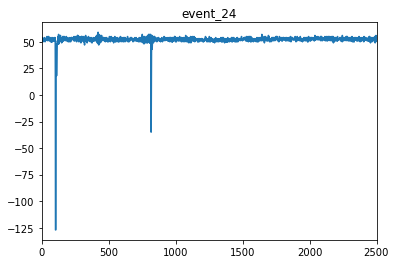

In [8]:
plot_figure(waveforms=waveforms_50, limits=[0,2500])

In [9]:
waveforms_110['event_46'][500:].mean()

52.3565

In [10]:
time = [8+59/60, 6+35/60, 5+5/60, 4.5, 3+18/60]
trigger = -1*np.array([-30, -50, -70, -90, -110])
trigger

array([ 30,  50,  70,  90, 110])

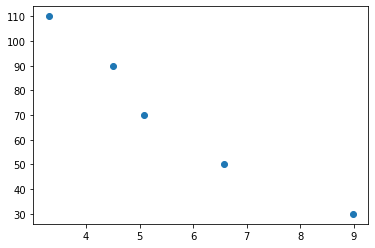

In [11]:
plt.scatter(time, trigger)

In [12]:
events = np.random.choice(waveforms_110.columns, size=1)

In [16]:
events

array(['event_46'], dtype=object)

In [19]:
event = waveforms_110[events[0]]
event

0       53.0
1       51.0
2       53.0
3       54.0
4       51.0
        ... 
2495    51.0
2496    54.0
2497    53.0
2498    52.0
2499    52.0
Name: event_46, Length: 2500, dtype: float64

In [21]:
plt.plot(event.index, event.values)

Error in callback <function flush_figures at 0x0000000009DB1700> (for post_execute):


KeyboardInterrupt: 

In [25]:
plt.plot(event.index.to_list(), event.values)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'